## An Introduction
Let $x \in \mathbb R$. A possible representation of that number is binary is as follows:
$$
x = \operatorname{sgn}{x} \cdot 2^e\left(\sum_{k\geq1}d_k 2^{-k}\right)
$$
Where $e$ is the exponent, $(d_k)_{k \geq 1} \supset \{0,1\}$ s.t. $d_1 = 1$

In a calculator (i.e. machine), we can only have a finite amount of range-values for $e$, and of the sequence $(d_k)_k$ aswell. Therefore we will truncate those numbers by:
- Defining the lower and upper bounds $L, U$ for $e$ s.t. $e \in [L, U]$
- Define an upper bound for $(d_k)_{1 \leq k \leq t}$.

Therefore the set of *machine numbers* is defined as $\mathbb F(2,t,L,U)$:
$$
\mathbb F(2,t,L,U) := \left\{x : x=(-1)^s 2^e\sum_{k\leq t}d_k2^{-k}\right\} \cup \{0\}
$$

## About this notebook
The goal of this notebook is to *generate* and *visualize* the set $\mathbb F(2,t,L,U)$ with Python and necessary frameworks, such as NumPy or Matplotlib.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from itertools import product
from tqdm import tqdm

In [2]:
def GenerateMachineNumbers(t: int, L: int, U: int) -> np.array:
    """
    Generate the set of machine numbers in base B=2, with parameters defined above.
    """

    # Validate inputs
    if t < 1:
        raise Exception("Invalid value t. It must be equal or greater than one.")
    if L>=0 or U <=0: 
        raise Exception("Invalid values for the lower/upper bound. The lower bound must be negative and the upper bound must be positive")

    # Define matrix with 0
    F: np.array = np.array([0])

    # Start filling F by experimenting with every single combination of s, significand and exponent.
    for s in [0, 1]:
        for e in range(L, U+1):
            for combination in product([0, 1], repeat=t-1):
                significand = 0.5

                for i, digit in enumerate(combination):
                    significand += (digit * 2**(-i-2))

                number = (-1)**s * 2**e * significand
                
                F = np.append(F, number)

    return np.sort(F)

In [3]:
my_numbers = (GenerateMachineNumbers(3, -1, 2))

Now let us plot this set:

In [4]:
# Code taken from Matplotlib documentation
import matplotlib.ticker as ticker

# Setup a plot such that only the bottom spine is shown
def setup(ax, L: np.array):
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.yaxis.set_major_locator(ticker.NullLocator())
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)
    ax.tick_params(which='minor', width=0.75)
    ax.tick_params(which='minor', length=2.5)
    ax.set_xlim(np.min(L)-1, np.max(L)+1)
    ax.set_ylim(0, 0.1)
    ax.patch.set_alpha(0.0)

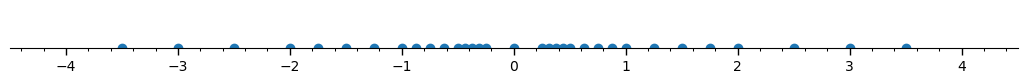

In [5]:
def plot(A: np.array):
    fig, ax = plt.subplots(figsize=(13,0.5))
    setup(ax, A)
    ax.scatter(A, np.zeros(len(A)))
    ax.xaxis.set_major_locator(ticker.AutoLocator())
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    plt.show()

plot(my_numbers)

As we can see, this is F(2, 3, -1, 2), concluding the notebook. $\blacksquare$

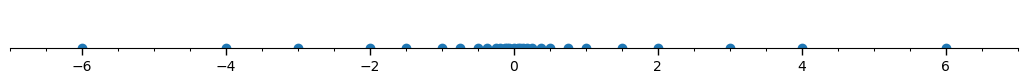

In [10]:
plot(GenerateMachineNumbers(2, -3, 3))